# Monte Carlo and "the power of randomness"

**Fun summer game: throwing pebbles on the sand and estimatiing pi**

- The key idea of this technique is that the ratio of the area of the circle to the square area that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$.

$$\frac{V_{circle}}{V_{square}} = \frac{\pi r^2}{(2r)^2}  = \frac{\pi}{4}$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def circle_pi_estimate(N=10000, r0=1):
    """
    Estimate the value of pi using the Monte Carlo method.
    
    Generate N random points in a square with sides ranging from -r0 to r0.
    Count the fraction of points that fall inside the inscribed circle to estimate pi.
    
    Parameters:
    N (int): Number of points to generate (default: 10000)
    r0 (int): Radius of the circle (default: 10)

    Returns:
    float: Estimated value of pi
    """

    # Generate random points
    xs = np.random.uniform(-r0, r0, size=N)
    ys = np.random.uniform(-r0, r0, size=N)

    # Calculate distances from the origin and determine points inside the circle
    inside = np.sqrt(xs**2 + ys**2) < r0
    
    # Compute volume ratio as the ratio of points
    v_ratio = inside.sum() / N

    pi_estimate = 4 * v_ratio
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(xs[inside], ys[inside], 'b.', label='Inside')
    ax.plot(xs[~inside], ys[~inside], 'r.', label='Outside')
    ax.set_title(f"Estimation of $\pi$ = {pi_estimate}", fontsize=20)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

3.14432

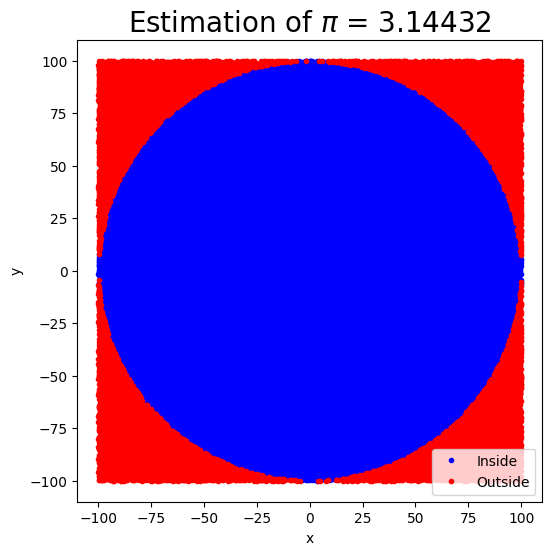

In [14]:
circle_pi_estimate(N=100000, r0=100)

### Shapes more complex than a circle

$$I = e^{-x}+ e^{-x^2} x^2cos(x)^2 + e^{-2x}x^4 cos(2x)^2 $$


- We will now use the same technique but compute a 1D definite integral from $x_1$ to $x_2$ by drawing a rectangle to cover the curve with dimensions $x=[x_1,x_2]$ and $y= [a,b]$. 

- The area of the rectangle is simply $A$=2. The area under the curve is $I$. 
- If we choose a point uniformly at random in the rectangle, What's the probability that the point falls into the region under the curve? It is obviously

$$p = \frac{n_{in}}{N} \approx \frac{I}{A}$$ 

- Thus we can estimate definite integral by drawing N uniform numbers covering range and computing integral as $I = A\frac{n_{in}}{N}$


Text(0, 0.5, 'f(x)')

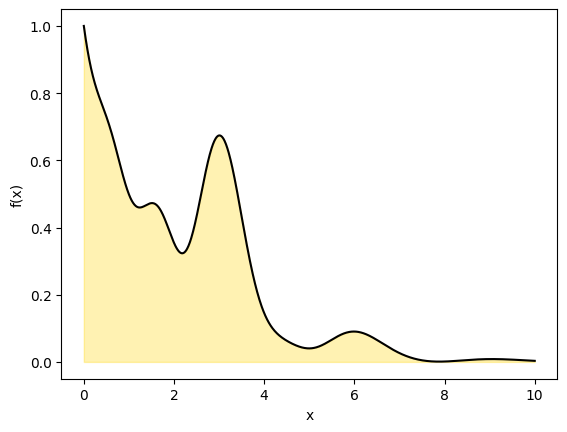

In [64]:
def myfunc1(x):
    return np.exp(-x)+ np.exp(-x)* x**2 * np.cos(x)**2 + np.exp(-2*x)*x**4* np.cos(2*x)**2

x= np.linspace(0, 10, 1000)
y = myfunc1(x)
plt.plot(x,y, c='k')
plt.fill_between(x, y,color='gold',alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')

In [ ]:
def mc_integral(func, 
                N=10000, 
                Lx=2, Ly=1, 
                plot=True):
    '''Generate random points in the square with [0, Lx] and [0, Ly]
      Count the fraction of points falling inside the curve
      '''
  
    # Generate uniform random numbers
    ux = Lx*np.random.rand(N) 
    uy = Ly*np.random.rand(N) 

    #Count accepted point.  
    pinside  = uy<func(ux)

    # Total area times fraction of sucessful points
    I = Lx*Ly*pinside.sum()/N 

    if plot==True:
    
      plt.plot(ux[pinside],  uy[pinside],'o', color='red')
      plt.plot(ux[~pinside], uy[~pinside],'o', color='green')

      x = np.linspace(0.001, Lx,100)
      plt.plot(x, func(x), color='black', lw=2)
      plt.title(f'I =  {I:.4f} with N={N} samples',fontsize=12)
      
    return I

### Calculate integral numerically first
from scipy import integrate

#adjust limits of x and y
Lx = 10  # x range from 0 to Lx
Ly = 1.1 # y range from 0 to Ly

y, err = integrate.quad(myfunc1, 0, Lx)

print("Exact result:", y)

I = mc_integral(myfunc1, N=10000, Lx=Lx, Ly=Ly) 

print("MC result:", I)


### The Essence of Monte Carlo Simulations

- Suppose we want to evaluate an integral $ I $.

$$I = \int f(x) \, dx$$

- A powerful perspective is to reinterpret this integral as the expectation of a function $ g(x) $ under some probability distribution $ p(x) $:

$$
I = \int \frac{f(x)}{p(x)} p(x) \, dx = \int g(x) \, p(x) \, dx = \mathbb{E}_p[g(x)]
$$

- In this form, the integral becomes the expected value of $ g(x) $ with respect to the distribution $ p(x) $. 
- To estimate $ \mathbb{E}_p[g] $, we draw samples $ x_i \sim p(x) $ and apply the **law of large numbers**, which guarantees that the sample average converges to the expected value as $ n \to \infty $:

$$
\mathbb{E}_p[g] \approx \frac{1}{n} \sum_{i=1}^n g(x_i), \quad \text{where } x_i \sim p(x)
$$


### Simple 1D applications of MC

#### Ordinary Monte Carlo and Uniform Sampling

- A common and intuitive case is when we draw samples uniformly from the interval $[a, b]$. In this setting, the sampling distribution is constant: $ p(x) = \frac{1}{b-a} $, and the integral simplifies as follows:

$$
I = \int_a^b f(x) \, dx = (b - a) \int_a^b \frac{f(x)}{b - a} \, dx \approx (b - a) \cdot \frac{1}{n} \sum_{i=1}^n f(x_i) = (b - a) \cdot \bar{f}_n
$$

- This gives a clear interpretation of Monte Carlo integration: we approximate the average height of the function $ f(x) $ over the interval by randomly sampling points, much like tossing pebbles onto a plot and estimating the shaded area.

In [87]:
def myfunc1(x):
    return np.exp(-x)+ np.exp(-x)* x**2 * np.cos(x)**2 + np.exp(-2*x)*x**4* np.cos(2*x)**2

In [88]:
x0, x1 = 0, 10
N = 100000
x = np.random.uniform(x0, x1, N)

integral = (x1-x0) * np.mean(  myfunc1(x) )

print('MC result', integral)

y, err = integrate.quad(myfunc1, 0, Lx)

print("Exact result:", y)

MC result 2.2876374153624095
Exact result: 2.2898343018663505


#### Sampling from the Boltzmann Distribution

- Quantities like average energy, heat capacity, or pressure are computed as **ensemble averages** under the Boltzmann distribution. 
- The Boltzmann distribution for a system with energy $E(x)$ at inverse temperature $\beta = 1/(k_B T)$ is:

$$
p(x) = \frac{e^{-\beta E(x)}}{Z}, \quad \text{where } Z = \int e^{-\beta E(x)} \, dx
$$

- Suppose we are interested in the average energy:

$$
\langle E \rangle = \int E(x) \, p(x) \, dx 
$$

- This is an **expectation value** under the Boltzmann distribution $p(x)$.  
- If we can draw samples $x_i \sim p(x)$, we can estimate $\langle E \rangle$ by:

$$
\langle E \rangle \approx \frac{1}{n} \sum_{i=1}^n E(x_i)
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 1.0  # inverse temperature
n_samples = 10000

# Boltzmann sampling for harmonic oscillator: Gaussian with variance 1/beta
x_samples = np.random.normal(loc=0.0, scale=np.sqrt(1 / beta), size=n_samples)

# Energy function E(x) = (1/2) * x^2
E = 0.5 * x_samples**2

# Estimate average energy ⟨E⟩
E_mean = np.mean(E)
E_exact = 0.5 / beta

print(f"Estimated ⟨E⟩: {E_mean:.4f}")
print(f"Exact ⟨E⟩:     {E_exact:.4f}")

# Plot histogram and overlay Boltzmann density
x_vals = np.linspace(-4, 4, 500)
p_vals = np.exp(-0.5 * beta * x_vals**2)
p_vals /= np.trapz(p_vals, x_vals)  # normalize for display

plt.figure(figsize=(8, 4))
plt.hist(x_samples, bins=50, density=True, alpha=0.6, label='Sampled $x_i$')
plt.plot(x_vals, p_vals, color='crimson', label='Boltzmann $p(x) \\propto e^{-\\beta E(x)}$')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.title('Boltzmann Sampling from Harmonic Potential')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


### More dimensions 

- Calculate are under 2D Gaussian over [-a, a] and [-b, b] region

$$f(x,y) = \frac{1}{2\pi\sigma_x \sigma_y}e^{-\frac{x^2}{2\sigma^2_x}-\frac{y^2}{2\sigma^2_y} }$$

In [ ]:
import numpy as np
from scipy.stats import norm

# Parameters
sigma_x = sigma_y = 1
a = b = 3

# Analytical value of the integral over [-a, a] x [-b, b]
analytical_integral = (norm.cdf(a, scale=sigma_x) - norm.cdf(-a, scale=sigma_x)) * \
                      (norm.cdf(b, scale=sigma_y) - norm.cdf(-b, scale=sigma_y))

# Monte Carlo integration
N = 1_000_000  # Number of samples

# Generate random uniform samples in the rectangle [-a, a] x [-b, b]
x_samples = np.random.uniform(-a, a, N)
y_samples = np.random.uniform(-b, b, N)

# Evaluate the 2D Gaussian at these points
f_values = (1 / (2 * np.pi * sigma_x * sigma_y)) * \
           np.exp(-0.5 * ((x_samples / sigma_x) ** 2 + (y_samples / sigma_y) ** 2))

# Estimate the integral: average value of f * area of the integration region
area = (2 * a) * (2 * b)
monte_carlo_integral = f_values.mean() * area

# Output both results
analytical_integral, monte_carlo_integral


(0.9946076967722628, 0)

### Why Does Monte Carlo Outperform Brute-Force Integration?

- Using i.i.d. random variables in Monte Carlo (MC) allows us to apply the Central Limit Theorem and infer that the mean we are calculating $\bar{g}$ will have variance proportional to N number of samples $\sigma_N^2 = N\sigma^2_1$ where $\sigma_1$ is variance in single steps. 
- Consequently, the convergence rate of Monte Carlo integration is $\mathcal{O}(n^{-1/2})$, which is notable because it is independent of the number of dimensions of the integral.
- This property gives Monte Carlo an edge over numerical integration methods, which have a convergence rate of $\mathcal{O}(n^{-d})$, especially in moderate- to high-dimensional contexts.
Even in low-dimensional scenarios, Monte Carlo can be advantageous, particularly when the region of interest within the integration space is small. This allows for targeted sampling in critical areas.

#### On convergence of MC simulations 

We are often interested in knowing how many iterations it takes for Monte Carlo integration to "converge". To do this, we would like some estimate of the variance, and it is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of iterations is simply to do many such simulations.

For the example, we will try to estimate the function (again)

$$
f(x) = x \cos 71 x + \sin 13x, \ \  0 \le x \le 1
$$

Text(0, 0.5, '$f(x)$')

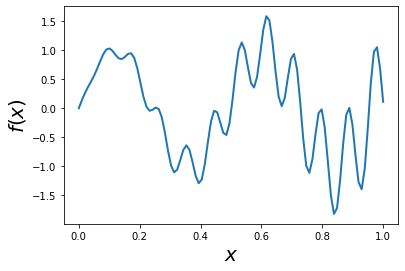

In [32]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

x = np.linspace(0, 1, 100)

plt.plot(x, f(x),linewidth=2.0)


plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)

- We will vary the sample size from 1 to 100 and calculate the value of $y = \sum{x}/n$ for 1000 replicates. We then plot the 2.5th and 97.5th percentile of the 1000 values of $y$ to see how the variation in $y$ changes with sample size.

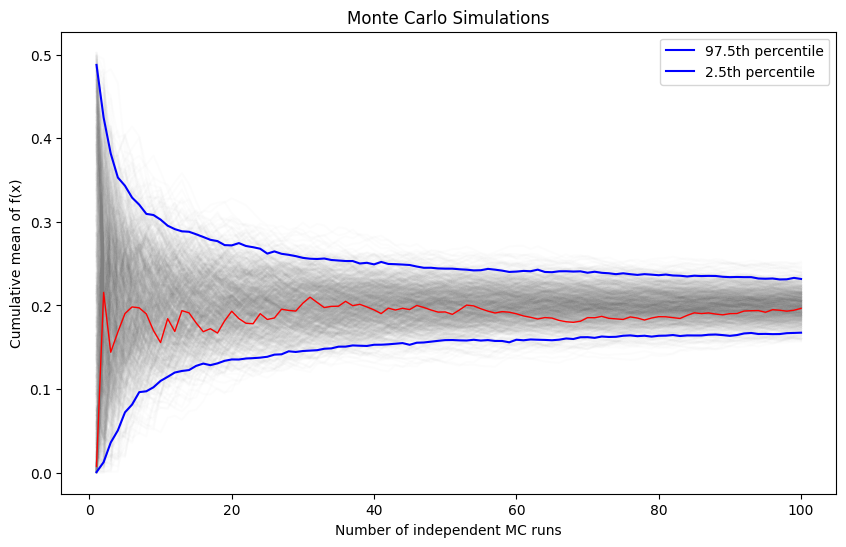

In [81]:
n = 100
reps = 1000

# Generating random numbers and applying the function
fx = f(np.random.random((n, reps)))

# Calculating cumulative mean for each simulation
y = np.cumsum(fx, axis=0) / np.arange(1, n+1)[:, None]

# Calculating the upper and lower percentiles
upper, lower = np.percentile(y, [97.5, 2.5], axis=1)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(reps):
    plt.plot(np.arange(1, n+1), y[:, i], c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', label='97.5th percentile')
plt.plot(np.arange(1, n+1), lower, 'b', label='2.5th percentile')

plt.xlabel('Number of independent MC runs')
plt.ylabel('Cumulative mean of f(x)')
plt.title('Monte Carlo Simulations')
plt.legend()
plt.show()

### Importance Sampling

- Suppose we want to evaluate the expectation of a function $ h(x) $ under a probability distribution $ p(x) $:

$$
I = \int h(x)\, p(x) \, dx
$$

- If sampling directly from $ p(x) $ is difficult, we can instead introduce an alternative distribution $ q(x) $ — one that is easier to sample from — and rewrite the integral as:

$$
I = \int h(x)\, p(x)\, dx = \int h(x)\, \frac{p(x)}{q(x)} \, q(x) \, dx
$$

- This reformulation allows us to draw samples $ y_i \sim q(x) $, and weight them by the **importance ratio** $ \frac{p(y_i)}{q(y_i)} $. The expectation can then be estimated using:

$$
I \approx \frac{1}{n} \sum_{i=1}^n \frac{p(y_i)}{q(y_i)} h(y_i)
$$

- This is the essence of **importance sampling**: reweighting samples from an easier distribution to approximate expectations under a more complex one.


In [ ]:
# Range for plotting
y_vals = np.linspace(-6, 6, 500)

# Evaluate functions
p_vals = p(y_vals)
q_uniform_vals = q_uniform(y_vals)
q_better_vals = q_better(y_vals)

# Normalize p(y) for display only
p_vals_normalized = p_vals / np.trapz(p_vals, y_vals)

# Evaluate on wide range
y_vals = np.linspace(-6, 6, 1000)
p_vals = p(y_vals)

# Determine region of significant mass: where p(y) > 1% of max
threshold = 0.01 * np.max(p_vals)
mask = p_vals > threshold
y_zoom = y_vals[mask]
p_zoom = p_vals[mask]
q_uniform_zoom = q_uniform(y_zoom)
q_better_zoom = q_better(y_zoom)

# Normalize p for plotting
p_zoom_normalized = p_zoom / np.trapz(p_zoom, y_zoom)

# Importance weights (unnormalized)
w_uniform_zoom = p_zoom / q_uniform_zoom
w_better_zoom = p_zoom / q_better_zoom

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Top: Distributions
axes[0].plot(y_zoom, p_zoom_normalized, label='Target $p(y)$ (normalized)', color='crimson', linewidth=2)
axes[0].plot(y_zoom, q_uniform_zoom, label='Uniform proposal $q_{\\mathrm{uniform}}$', color='dodgerblue', linestyle='--')
axes[0].plot(y_zoom, q_better_zoom, label='Gaussian proposal $q_{\\mathrm{better}}$', color='forestgreen', linestyle='-.')
axes[0].set_ylabel('Density')
axes[0].set_title('Zoomed-In Target and Proposal Distributions')
axes[0].legend()
axes[0].grid(True, linestyle=':', alpha=0.7)

# Bottom: Weights
axes[1].plot(y_zoom, w_uniform_zoom, label=r'$w(y) = p(y)/q_{\mathrm{uniform}}$', color='dodgerblue', linestyle='--')
axes[1].plot(y_zoom, w_better_zoom, label=r'$w(y) = p(y)/q_{\mathrm{better}}$', color='forestgreen', linestyle='-.')
axes[1].set_xlabel('$y$')
axes[1].set_ylabel('Importance weight')
axes[1].set_yscale('log')
axes[1].set_title('Zoomed-In Importance Weights (Log Scale)')
axes[1].legend()
axes[1].grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define the unnormalized target distribution: p(y) ∝ exp(-y^4 + y^2)
def p(y):
    return np.exp(-y**4 + y**2)

# Uniform proposal over [a, b]
a, b = -5, 5
def q_uniform(y):
    return np.ones_like(y) / (b - a)

# Gaussian proposal centered at mode of p(y)
mu_q_better = 0.0
sigma_q_better = 1.0
def q_better(y):
    return (1 / (np.sqrt(2 * np.pi) * sigma_q_better)) * np.exp(-(y - mu_q_better)**2 / (2 * sigma_q_better**2))

# Dense sampling sizes for smoother convergence curves
sample_sizes = np.logspace(2, 4.5, num=20, dtype=int)  # From 100 to ~30,000

# Store estimates
uniform_estimates = []
better_estimates = []

# Estimate normalizing constant Z = ∫ p(y) dy
for N in sample_sizes:
    # Uniform proposal
    y_uniform = np.random.uniform(low=a, high=b, size=N)
    weights_uniform = p(y_uniform) / q_uniform(y_uniform)
    uniform_estimates.append(np.mean(weights_uniform))

    # Better Gaussian proposal
    y_better = np.random.normal(loc=mu_q_better, scale=sigma_q_better, size=N)
    weights_better = p(y_better) / q_better(y_better)
    better_estimates.append(np.mean(weights_better))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, uniform_estimates, label='Uniform proposal', color='mediumslateblue', marker='o')
plt.plot(sample_sizes, better_estimates, label='Gaussian proposal', color='seagreen', marker='s')
plt.axhline(y=better_estimates[-1], linestyle='--', color='gray', label='Reference (Gaussian, largest N)')

plt.xscale('log')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Importance sampling estimate of Z')
plt.title('Convergence of Importance Sampling Estimates')
plt.grid(True, which='both', linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


#### Using Monte Carlo to sample probability distributions

- Another application of a simple MC technique is to turn uniformly distributed random numbers into random numbers sampled according to different probability distributions.
- The key is to employ **rejection criteria**; if points go under the curve, they are accepted, hence generating a probability distribution 

In [ ]:
def mc_randnum_sample(func, N=10000, Lx=1, Ly=1):
    '''Sample random variables according to a distribution.
    func: given prob dist
    N:    random numbers used for sampling and rejection
    Lx, Ly range and domain size of distribution
    '''

    # uniform random samples
    ux =     Lx*np.random.rand(10000)
    uy =     Ly*np.random.rand(10000)  

    #rejection criteria
    idx = uy<=func(ux)          
    
    sampled_ux = ux[idx]

    ### Plotting    
    x = np.linspace(0, Lx, 100)

    plt.plot(x, func(x), lw=3)
    plt.hist(sampled_ux, density=True)

### Markov Chain Monte Carlo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mcmc_pi(N=int(1e4), delta=0.1, visualize=True):
    '''Use MCMC to estimate π via unit circle, optionally visualize the path'''
    
    pts = []  # accepted points
    r_old = np.random.uniform(-1, 1, size=2)

    for _ in range(N):
        dr = np.random.uniform(-delta, delta, size=2)
        r_new = r_old + dr
        
        if np.all(np.abs(r_new) <= 1.0):  # stay inside the square
            pts.append(r_new)
            r_old = r_new

    pts = np.array(pts)
    hits = pts[np.linalg.norm(pts, axis=1) < 1]

    pi_estimate = 4 * len(hits) / len(pts)

    if visualize:
        fig, ax = plt.subplots(figsize=(6, 6))
        
        # Plot unit circle
        circle = plt.Circle((0, 0), 1.0, color='gray', fill=False, linestyle='--', label='Unit Circle')
        ax.add_patch(circle)

        # Scatter points
        ax.plot(pts[:, 0], pts[:, 1], color='dodgerblue', alpha=0.3, label='Accepted steps')
        ax.scatter(hits[:, 0], hits[:, 1], color='crimson', s=1, label='Hits (inside circle)', alpha=0.5)

        # Optional: trace path of Markov chain
        ax.plot(pts[:, 0], pts[:, 1], lw=0.5, color='black', alpha=0.3)

        ax.set_aspect('equal')
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-1.1, 1.1)
        ax.set_title(f"MCMC estimate of π ≈ {pi_estimate:.5f} (delta={delta})")
        ax.legend()
        ax.grid(True, linestyle=':', alpha=0.6)
        plt.tight_layout()
        plt.show()

    return pi_estimate


In [ ]:
mcmc_pi(N=10000, delta=0.1)

Estimated Pi value is:  3.1435847932797962


Text(0.5, 1.0, 'Mean: 3.4336, Var: 0.1834')

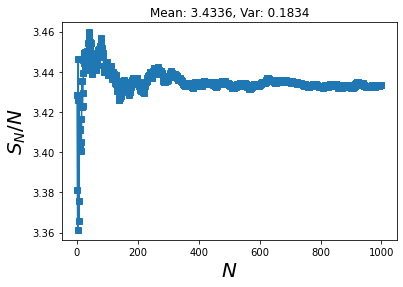

In [ ]:
n_runs = np.arange(1,1001)
N = 100

#Estimate pi via a number of mcmc simulations
pi_vals      =  [mcmc_pi(N, delta=0.1, visualize=False) for i in n_runs]
 
# Calculaate how mean improves with number of runs
sample_mean = np.cumsum(pi_vals ) / n_runs

plt.plot(n_runs, sample_mean, '-s')

plt.xlabel('$N$',fontsize=20)
plt.ylabel('$S_N/N$', fontsize=20)

plt.title( f"Mean: {np.mean(pi_vals ):.4f}, Var: {np.std(pi_vals ):.4f}" )

### Problems

#### MC, the crude version

Evaluate the following integral $\int^{\infty}_0 \frac{e^{-x}}{1+(x-1)^2} dx$ using Monte Carlo methods. 
- Start by doing a direct monte carlo on uniform interval. 
- Try an importance sampling approach using en exponential probability distribution. 
- Find the optimal value of $\lambda $ that gives the most rapid reduction of variance [Hint: experiment with different values of $\lambda$]

#### MC integral of 3D and 6D spheres!

- Generalize the MC code above for computing the volume of 3D and 6D spheres. 
- The analytical results are known: $V_{3d}=\frac{4}{3}\pi r^3$ and $V_{3d}=\frac{1}{6}\pi \pi^3 r^6$. So you can check the statistical error made in the simulations. 